In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Data Collection

# Loading datasets
data_science_salaries = pd.read_csv("data_science_salaries.csv")
countries_table = pd.read_csv("countries-table.csv")

In [3]:
# Step 2: Data Preparation

# Checking for missing values, outliers, and inconsistencies
print("Data Science Salaries Dataset:")
print(data_science_salaries.info())
print(data_science_salaries.describe())

Data Science Salaries Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB
None
         work_year        salary  salary_in_usd
count  6599.000000  6.599000e+03    6599.000000
mean   2022.818457  1.792833e+05  145560.558569
std       0.674809  5.263722e+05   70

In [4]:
print("\nCountries Table Dataset:")
print(countries_table.info())
print(countries_table.describe())


Countries Table Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          234 non-null    object 
 1   rank             234 non-null    int64  
 2   area             234 non-null    float64
 3   landAreaKm       234 non-null    float64
 4   cca2             233 non-null    object 
 5   cca3             234 non-null    object 
 6   netChange        226 non-null    float64
 7   growthRate       234 non-null    float64
 8   worldPercentage  228 non-null    float64
 9   density          234 non-null    float64
 10  densityMi        234 non-null    float64
 11  place            234 non-null    int64  
 12  pop1980          234 non-null    int64  
 13  pop2000          234 non-null    int64  
 14  pop2010          234 non-null    int64  
 15  pop2022          234 non-null    int64  
 16  pop2023          234 non-null    int

In [5]:
# Step 3: Merge Datasets

# Merging datasets based on common attributes
merged_data = pd.merge(data_science_salaries, countries_table, left_on='employee_residence', right_on='country')


In [6]:
# Step 4: Data Analysis

# Investigate the relationship between population size and the number of data scientists employed in each country
country_data_scientists = merged_data.groupby('country')['job_title'].count().reset_index()
country_population_2022 = merged_data[['country', 'pop2022']].drop_duplicates()
country_population_2023 = merged_data[['country', 'pop2023']].drop_duplicates()
country_analysis = pd.merge(country_data_scientists, country_population_2022, on='country')
country_analysis = pd.merge(country_analysis, country_population_2023, on='country')

In [7]:
# Analyze variations in data science salaries across different countries and their populations
salary_by_country = merged_data.groupby('country')['salary_in_usd'].mean().reset_index()
salary_population_analysis = pd.merge(salary_by_country, country_population_2023, on='country')

# Explore local trends in data science demand and salary structures
local_trends = merged_data.groupby(['country', 'work_year'])['salary_in_usd'].mean().reset_index()

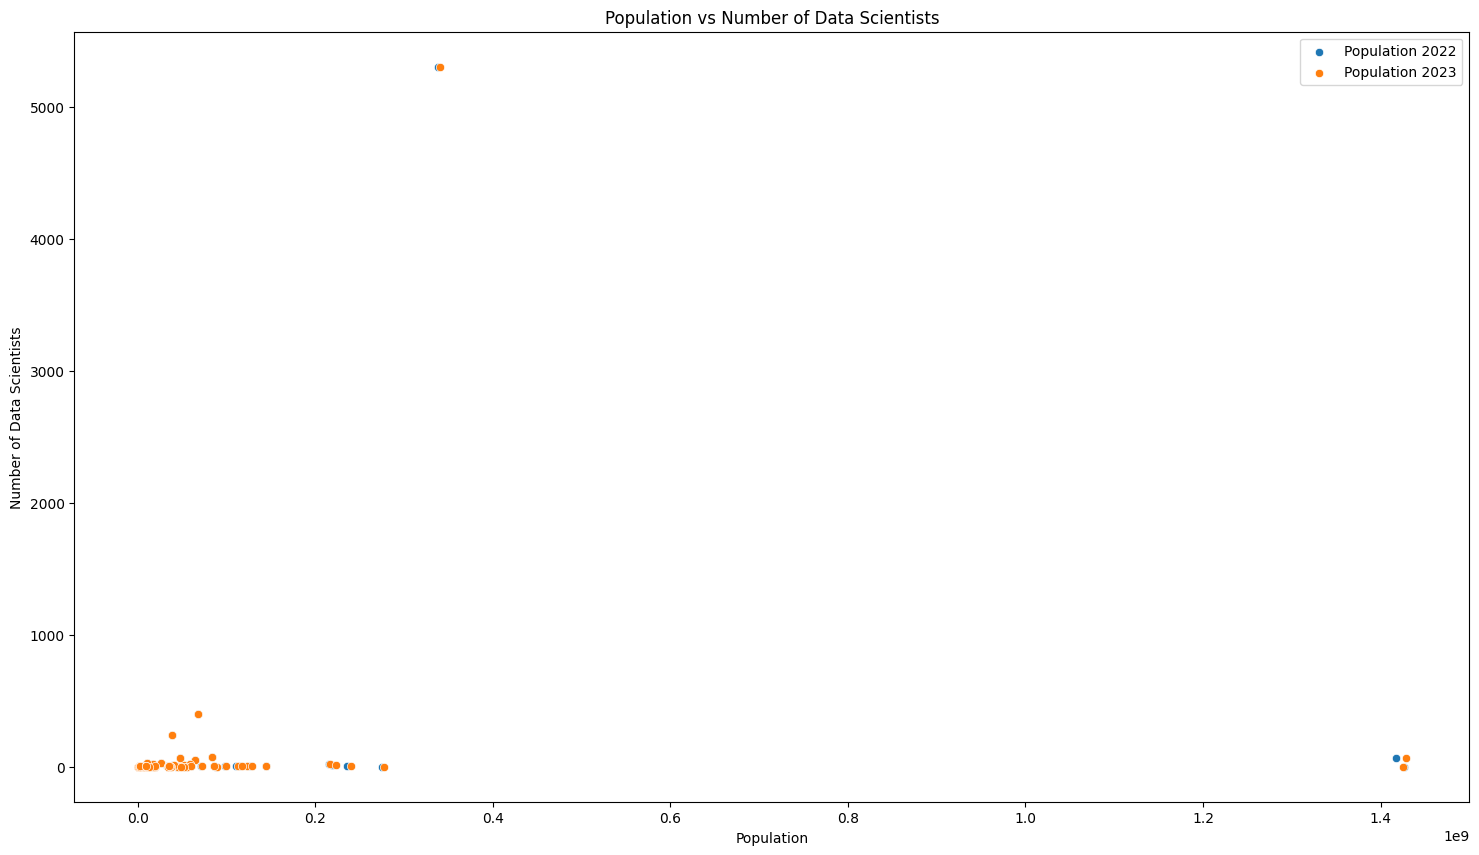

In [8]:
# Step 5: Data Visualization

# Investigating the relationship between population size and the number of data scientists employed in each country
plt.figure(figsize=(18, 10))
sns.scatterplot(x='pop2022', y='job_title', data=country_analysis, label='Population 2022')
sns.scatterplot(x='pop2023', y='job_title', data=country_analysis, label='Population 2023')
plt.xlabel('Population')
plt.ylabel('Number of Data Scientists')
plt.title('Population vs Number of Data Scientists')
plt.legend()
plt.show()

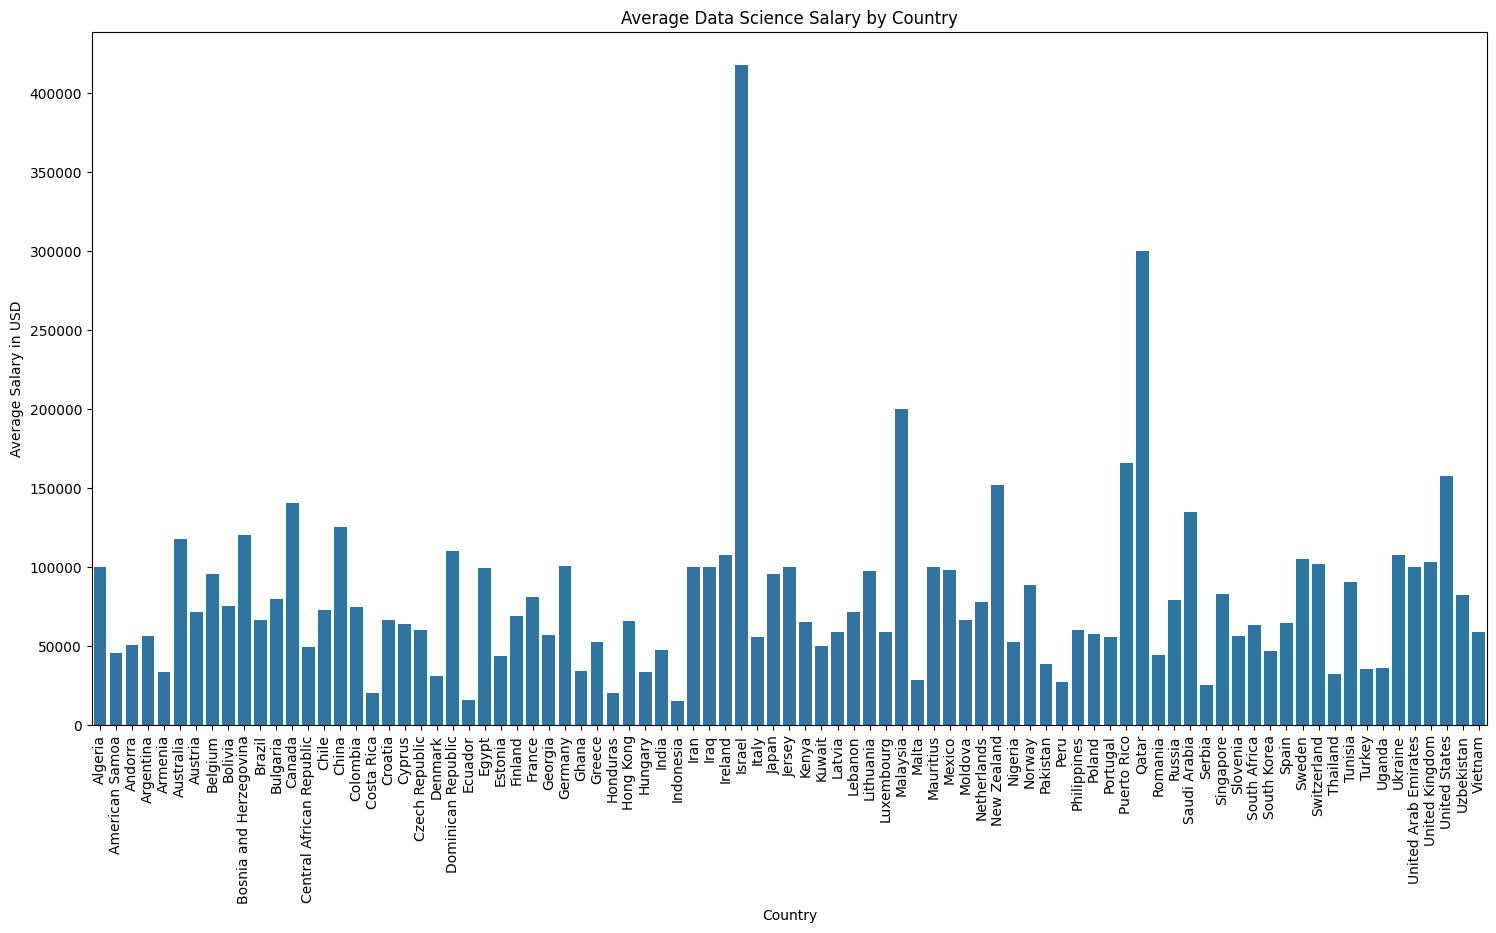

In [9]:
# Analyze variations in data science salaries across different countries and their populations
plt.figure(figsize=(18, 9))
sns.barplot(x='country', y='salary_in_usd', data=salary_population_analysis)
plt.xlabel('Country')
plt.ylabel('Average Salary in USD')
plt.title('Average Data Science Salary by Country')
plt.xticks(rotation=90)
plt.show()

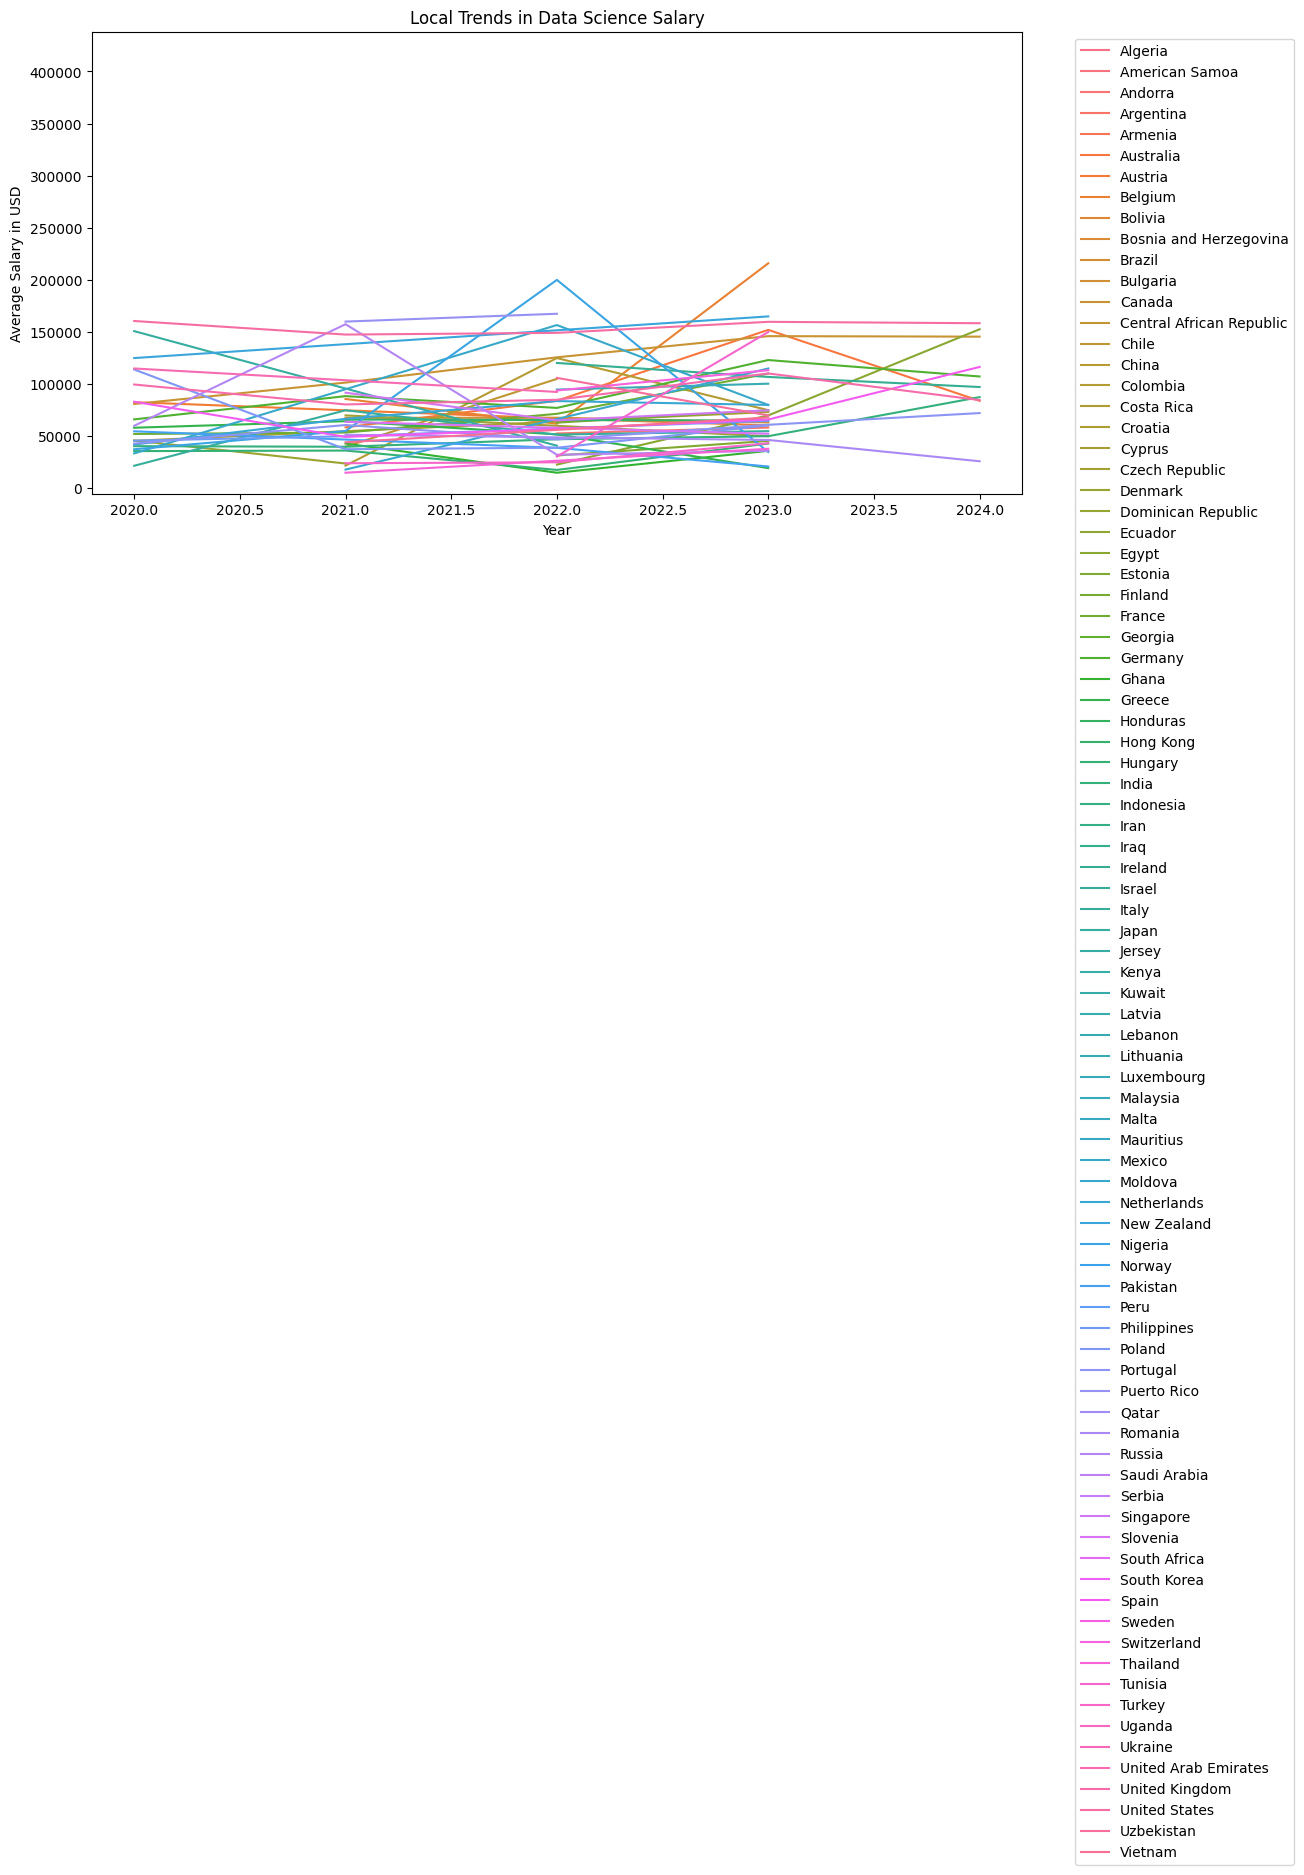

In [10]:
# Exploring local trends in data science demand and salary structures
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', hue='country', data=local_trends)
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.title('Local Trends in Data Science Salary')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [11]:
# Saving merged data to a new file
merged_data.to_csv("merged_data.csv", index=False)